## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import pandas as pd

## Loading images from directory

### Loading image paths into python dictionary

In [2]:
dataset_dir = "./dataset/data"
input_shape = (500, 500)

In [3]:
image_dataset = {"image": [], "class": []}
for i in os.listdir(dataset_dir):
    for file in os.listdir(os.path.join(dataset_dir, i)):
        image_dataset["image"].append(os.path.join(dataset_dir, i, file).replace("\\", "/"))
        image_dataset["class"].append(i)

### Converting dictionary into dataset

In [4]:
image_dataset = pd.DataFrame(image_dataset)
image_dataset.head()

,image,class
0,./dataset/data/000/a01-000u.png,000
1,./dataset/data/000/a01-003u.png,000
2,./dataset/data/000/a01-007u.png,000
3,./dataset/data/000/a01-011u.png,000
4,./dataset/data/000/a01-014u.png,000


## Splitting data into train and test

In [5]:
training_data, testing_data = train_test_split(image_dataset, test_size=0.2, random_state=25)
print(f"Dataframe shape: {image_dataset.shape}")
print(f"Train data shape: {training_data.shape}")
print(f"Test data shape: {testing_data.shape}")

Dataframe shape: (1539, 2)
Train data shape: (1231, 2)
Test data shape: (308, 2)


## Image Preprocessing

### Defining function

(500, 500)

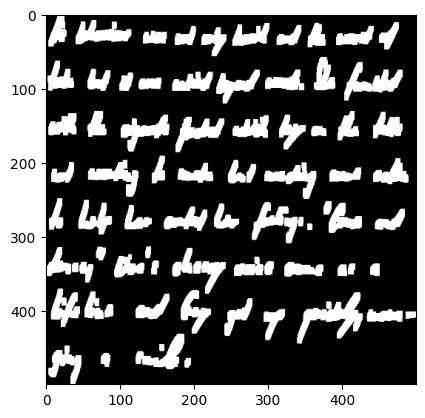

In [46]:
def image_preprocessing(image):
    img = cv2.imread(image)
    a = int(img.shape[0] * 20 / 100)
    b = int(img.shape[0] * 30 / 100)
    c = int(img.shape[1] * 3 / 100)
    img = img[a:img.shape[0] - b, c:img.shape[1]-c]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.fastNlMeansDenoising(img, None, 10,10,7)
    ret, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
    img = cv2.dilate(img, np.ones((5                    , 5), np.uint8), iterations=5)
    x, y, w, h = cv2.boundingRect(cv2.findNonZero(img))     # cropping image to text region only
    img = img[y:y+h, x:x+w]
    img = cv2.resize(img, input_shape)
    return img

df = image_dataset[image_dataset['class'] == '600']
img = image_preprocessing(df.image.iloc[0])
plt.imshow(img, cmap="gray")
img.shape